In [1]:
# Temporal, para agregar las rutas correctas
%run ../../src/ft1D/ruta_temporal.py
if not(src_path in sys.path[0]):
    sys.path.insert(0, os.path.abspath(a_path + src_path)) 

In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

import flopy
from flopy.plot.styles import styles
import xmf6
from flow_1D import build_gwf_1D
from tran_1D import build_gwt_1D
# Funciones para cálculo de la solución analítica
from wexler1 import sol_analytical_t
# Definición de parámetros de decaimiento y sorción
from sorption_decay import *

In [3]:
# ----- Definición de Parámetros -----
mesh = xmf6.MeshDis(
    nrow = 1,    # Number of rows
    ncol = 120,  # Number of columns
    nlay = 1,    # Number of layers
    row_length = 12.0,    # Length of system ($cm$)
    column_length = 0.1,  # Length of system ($cm$)
    top = 1.0,   # Top of the model ($cm$)
    bottom = 0,  # Layer bottom elevation ($cm$)
)
xmf6.nice_print(mesh.get_dict(), 'Space discretization')

tm_par = dict(
    nper = 1,  # Number of periods
    total_time = 120.0,  # Simulation time ($s$)
    nstp = 240,   # Number of time steps
    tsmult = 1.0  # Multiplier for the length of successive time steps.
)
xmf6.nice_print(tm_par, 'Time discretization')
    
ml_units = {
    "time": "seconds",
    "length": "centimeters"
}
xmf6.nice_print(ml_units, 'Units')

ph_par = dict(
    specific_discharge = 0.1,  # Specific discharge ($cm s^{-1}$)
    hydraulic_conductivity = 0.01,  # Hydraulic conductivity ($cm s^{-1}$)
    source_concentration = 1.0,  # Source concentration (unitless)
    porosity = 0.1,  # Porosity of mobile domain (unitless)
    initial_concentration = 0.0,  # Initial concentration (unitless)
    longitudinal_dispersivity = 1.0, # 0.1, 1.0, 1.0, 1.0
    retardation_factor = 1.0,        # 1.0, 1.0, 2.0, 1.0
    decay_rate =  0.0                # 0.1, 0.0, 0.0, 0.01
)
ph_par["dispersion_coefficient"] = ph_par["longitudinal_dispersivity"] * ph_par["specific_discharge"] / ph_par["retardation_factor"]
xmf6.nice_print(ph_par, 'Physical parameters')
    
os_par = dict(
    ws = os.getcwd() + '/output', # Ruta de donde estamos actualmente
    mf6_exe = '/home/jovyan/GMMC/WMA/mf6/bin/mf6', # Ejecutable
    flow_name = 'flow', # Nombre de la simulación para flujo
    tran_name = 'transport' # Nombre de la simulación para transporte
)
xmf6.nice_print(os_par, 'MODFLOW 6 environment')
                     
oc_par = dict(
    head_file = f"{os_par['flow_name']}.hds",
    fbudget_file = f"{os_par['flow_name']}.bud",
    concentration_file=f"{os_par['tran_name']}.ucn",
    tbudget_file = f"{os_par['tran_name']}.bud",
)
xmf6.nice_print(oc_par, 'Output files')


Space discretization
------------------------------
          row_length = 12.0      
          col_length = 0.1       
          lay_length = 1.0       
                ncol = 120       
                nrow = 1         
                nlay = 1         
                delr = 0.1       
                delc = 0.1       
                dell = 1.0       
                 top = 1.0       
              bottom = 0         

Time discretization
------------------------------
                nper = 1         
          total_time = 120.0     
                nstp = 240       
              tsmult = 1.0       

Units
------------------------------
                time = seconds   
              length = centimeters

Physical parameters
------------------------------
  specific_discharge = 0.1       
hydraulic_conductivity = 0.01      
source_concentration = 1.0       
            porosity = 0.1       
initial_concentration = 0.0       
longitudinal_dispersivity = 1.0       
  retardation_

head_L = 12.899999999999777 	 head_R = 1.0


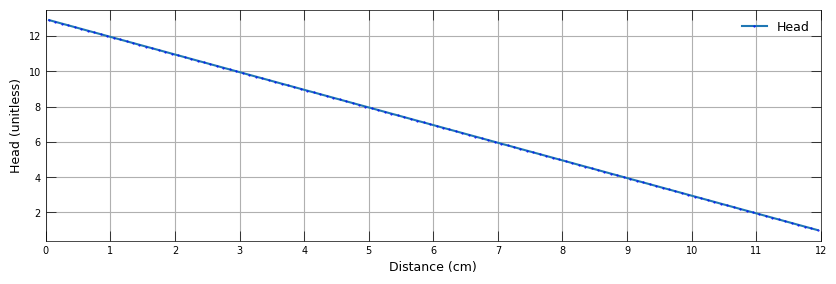

In [4]:
sim_f, gwf = build_gwf_1D(mesh, tm_par, ph_par, ml_units, os_par, oc_par)
sim_f.write_simulation(silent=True)
sim_f.run_simulation(silent=True)
xmf6.plot_flow_1D(gwf, mesh, os_par, oc_par)

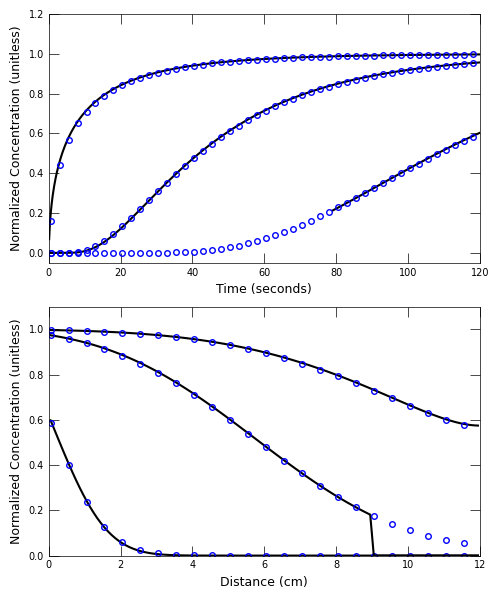

In [5]:
# Solución de transporte
sim_t, gwt = build_gwt_1D(mesh, tm_par, ph_par, ml_units, os_par, oc_par)
sim_t.write_simulation(silent=True)
sim_t.run_simulation(silent=True)
xmf6.plot_tran_1D(sim_t, mesh, tm_par, ph_par, os_par, oc_par)